<a href="https://colab.research.google.com/github/msteinhilber/MPM_200_Steinhilber/blob/main/Code/MPM200_Session5_HW_MSteinhilber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPM 200: Assignment 4

### Due 29th October 2025 9AM

* For all questions, you must show your work. This will enable us to understand your thought process, give partial credit, and prevent crude cheating.
* Please make sure that you are not simply copying each other's code, but rather striving to understand each other's work and learn from it
* Additionally, please provide the R code at the end of your solution and include R commands along with R outputs. This will help to describe your solutions more clearly.

# Section 0: R

**Q0: install package "beepr" from CRAN and use *beep()* function to make "MARIO" sound.**

Make sure you have the following packages installed.
1. Tidyverse
2. dplyr
3. ggplot2
4. sjPlot

In [1]:
install.packages ('tidyverse')
install.packages ('dplyr')
install.packages ('ggplot2')
install.packages ('sjPlot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘effectsize’, ‘bayestestR’, ‘datawizard’, ‘ggeffects’, ‘insight’, ‘parameters’, ‘performance’, ‘sjlabelled’, ‘sjmisc’, ‘sjstats’




In [2]:
library ('tidyverse')
library ('dplyr')
library ('ggplot2')
library ('sjPlot')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.2.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘sjPlot’


The following object is masked from ‘package:ggplot2’:

    set_theme




## Will the hummers survive?

#### As a wildlife veterinarian, you are interested in understanding the trends in hummingbird survival in California. To achieve this, you collaborate with several regional rehabilitation centers and develop a dataset of hummingbird rehabilitation cases, based on records maintained by these centers.


#### The data recorded wasthe  following:

Disposition_binary: Died or Released  
Place: Rehabilitation center  
F_Aid: First aid provided  
Species_e: Hummingbird species: ANHU == Anna's Hummingbirds, NonSselasphorus: non-orange hummingbirds that are not identified till species level, Selasphorus: Hummingbirds that are from Selasphorus genus but not identified until species level, BCHU: Black-chinned hummingbirds  
Sex_e:  
Age_e:  
Brought_in_after: Number of days it was with the rescuer before it came to a  rehabilitation center  
season: season when it was admitted  
r: reason for admission  
Green_Orange: species classification: Green or Orange bird  
ID: unique ID given to the  individual bird


### Your aim is to identify factors that affect the survival or successful release of hummingbirds once they are admitted to the rehabilitation center. You are expected to do the following:
1. Tabulate and plot the distribution of your outcome variable
2. Identify covariates that you think (based on your general understanding) and explore individual covariates
3. Plot/tabulate individual covariates with your outcome
4. Run univariate generalized linear models
5. Run backward elimination to find the best-fitting model
6. Run forward addition to finding the best fitting model

# Section 1
### Reading the data
Here, you will read the **Hummingbird_data.csv** file dataset and create a random sample of it. You will use this random sample of the dataset to complete the rest of the exercise.


**Q1. read the Hummingbird_data.csv file in R**   
2 points

In [ ]:
#read the csv file and
#data  = Hummingbird_data.csv

ERROR: Error in Hummingbird_data.csv("/content/Hummingbird_data.csv"): could not find function "Hummingbird_data.csv"


In [4]:
Hummingbird_data = read.csv ('/content/Hummingbird_data.csv')

In [5]:
colnames(Hummingbird_data)

[1] "Admitted"           "Disposition_binary" "Place"             
 [4] "F_Aid"              "Species_e"          "Sex_e"             
 [7] "Age_e"              "Brought_in_after"   "season"            
[10] "r"                  "Green_Orange"       "ID"

**Q2. How many rows and columns are in the datafame**  
1 point

In [6]:
nrow (Hummingbird_data)

[1] 6908

In [7]:
ncol (Hummingbird_data)

[1] 12

In [ ]:
## your code answer here
## 6908 rows and 12 columns

### Checking the Structure of Each Column and Identifying Data Types
* Use the `str()` function to view the structure of the dataframe.  
*
Use the` sapply(`) function with class() to identify the data types of each column
*
Discuss any observations or potential issues with the data types.

In [8]:
str(Hummingbird_data)


'data.frame':	6908 obs. of  12 variables:
 $ Admitted          : chr  "1/2/1991" "1/2/1991" "1/4/1991" "1/5/1991" ...
 $ Disposition_binary: chr  "Died" "Released" "Died" "Died" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "Lindsey" ...
 $ F_Aid             : chr  "No" "Yes" "No" "No" ...
 $ Species_e         : chr  "ANHU" "ANHU" "ANHU" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "Female-like " "Female-like " "Female-like " ...
 $ Age_e             : chr  "adult-like" "adult-like" "adult-like" "adult-like" ...
 $ Brought_in_after  : int  1 0 0 4 0 0 0 0 0 0 ...
 $ season            : chr  "Winter" "Winter" "Winter" "Winter" ...
 $ r                 : chr  "found on the ground" "unknown" "suspect torpor-like state" "unknown" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "1_ANHU" "2_ANHU" "3_ANHU" "4_ANHU" ...


In [9]:
# Identify data types of each column
data_types = sapply(Hummingbird_data, class)
print(Hummingbird_data)

       Admitted Disposition_binary         Place F_Aid       Species_e
1      1/2/1991               Died       Lindsey    No            ANHU
2      1/2/1991           Released       Lindsey   Yes            ANHU
3      1/4/1991               Died       Lindsey    No            ANHU
4      1/5/1991               Died       Lindsey    No            ANHU
5      1/5/1991               Died       Lindsey    No            ANHU
6      1/5/1991               Died       Lindsey    No            ANHU
7      1/6/1991               Died       Lindsey    No            ANHU
8      1/7/1991               Died       Lindsey    No            ANHU
9      1/8/1991               Died       Lindsey    No            ANHU
10    1/11/1991               Died       Lindsey    No            ANHU
11    1/13/1991               Died       Lindsey    No            ANHU
12    1/14/1991               Died       Lindsey    No            ANHU
13    1/21/1991               Died       Lindsey    No            ANHU
14    

In [ ]:
# Admitted column should be Admitted_date since data in that column is a date


Next step is to create a random subset of the given data.   
Use the given code to create the subset data.

In [10]:
library(dplyr)
model_data = sample_n(Hummingbird_data, 5000)

**Use *model_data* dataframe to answer remainder questions of the assingment.**

**Q3: How many rows and columns are present in your data frame currently?  
1 Point**

In [11]:
nrow (model_data)

[1] 5000

In [12]:
ncol (model_data)

[1] 12

In [ ]:
#5000 rows and 12 columns

**Q4: How many columns are categorical variables, and how many are continuous variables in the dataset?  
2 Points**

In [13]:
str(model_data)

'data.frame':	5000 obs. of  12 variables:
 $ Admitted          : chr  "5/8/1991" "4/14/1994" "3/11/2006" "5/6/2013" ...
 $ Disposition_binary: chr  "Died" "Released" "Released" "Released" ...
 $ Place             : chr  "Lindsey" "Lindsey" "Lindsey" "malibu" ...
 $ F_Aid             : chr  "No" "No" "No" "No" ...
 $ Species_e         : chr  "ANHU" "Non-selasphorus" "Non-selasphorus" "ANHU" ...
 $ Sex_e             : chr  "Female-like " "unknown" "unknown" "Female-like " ...
 $ Age_e             : chr  "adult-like" "Nestling" "Nestling" "adult-like" ...
 $ Brought_in_after  : int  0 0 1 0 0 0 0 0 4 18 ...
 $ season            : chr  "Spring" "Spring" "Spring" "Spring" ...
 $ r                 : chr  "unknown" "nest-related" "unknown" "unknown" ...
 $ Green_Orange      : chr  "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." "Non-selasphorus spp." ...
 $ ID                : chr  "94_ANHU" "613_ANHU" "3022_ANHU" "5933_ANHU" ...


In [ ]:
# 11 columns are categorical variables and 1 is continuous

**Q5: Submit your model_data file along with your submission.  
Save it as "Hummingbird_data_YOURNAME.csv" and submit it    
2 Points**

In [14]:
library(ggplot2)

In [15]:
write.csv(model_data, "/content/Hummingbird_data_MorganSteinhilber.csv")

# Section 2
## Rehabilitation Center and number of hummingbirds
Lets see how we can explore how many birds were admitted to each rehabilitation center (represented by column Place).  
We will use functions from` dply`r to generate summary tables and plot them using` GGplot`2

In [16]:
model_data%>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

Place,count
<chr>,<int>
Lindsey,4145
Santa Barbara,67
malibu,788


In [17]:
rehab = model_data  %>%
group_by(Place)%>%
summarise(count = n_distinct(ID))

In [18]:
p = ggplot(rehab, aes(x = Place, y = count)) +
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+
labs(title = "Number of rescued hummingbirds")

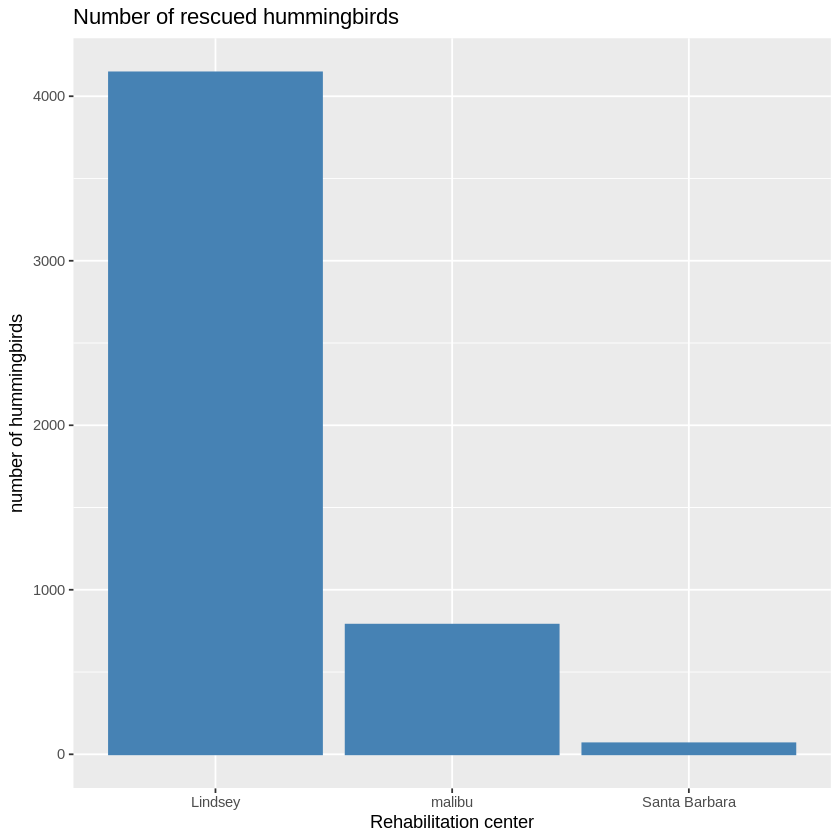

In [19]:
p

**Q6: Please save this plot to a PDF file and submit it along with your assignment. Ensure that the size of the plot is 4 inches wide and 3 inches tall.  
Point: 2**  

In [20]:
ggsave("/content/Hummingbird_plot.pdf", width = 4, height = 3, units = "in")

**Q7: Please explain the code above in words, including what each line of R code is doing, starting from the code that creates the "Rehab" object until the plot.  
Points: 2**  

In [21]:
rehab = model_data  %>% #creates a new data frame
group_by(Place)%>% #groups data by the place column
summarise(count = n_distinct(ID)) #counts the unique IDs for each place

In [22]:
p = ggplot(rehab, aes(x = Place, y = count)) + #creates a plot
geom_bar(stat="identity", color = 'steelblue', fill = 'steelblue')+
#specifies that it should be a barplot using the data values and specifies what color to make the bars
xlab('Rehabilitation center')+ ylab('number of hummingbirds')+ #labels x and y axes
labs(title = "Number of rescued hummingbirds") #creates label for plot

# Section 3

## Key variables that affect the survival of hummingbirds  

#### Do the following steps
1. List 5 covariates from data columns that you think might affect the survival.   
2. For each variable, create a table showing the number of birds that survived and died for each subcategory for the covariate.  
3. To do that, create a table first with COVARIATE, Disposition_binary, and unique IDs
4. Then use that data frame to generate bar plots and use  `facet_grid` function in `GGPlot`

In [ ]:
# 5 covariates: Place, F_Aid, Age_e, Brought_in_after, season

In [23]:
table_Place <- model_data %>%
group_by(Place, Disposition_binary)%>%
summarise(count = n_distinct(ID))

table_F_Aid <- model_data %>%
group_by(F_Aid, Disposition_binary)%>%
summarise(count = n_distinct(ID))

table_Age_e <- model_data %>%
group_by(Age_e, Disposition_binary)%>%
summarise(count = n_distinct(ID))

table_Brought_in_After <- model_data %>%
group_by(Brought_in_after, Disposition_binary)%>%
summarise(count = n_distinct(ID))

table_season <- model_data %>%
group_by(season, Disposition_binary)%>%
summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Place'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'F_Aid'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Age_e'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'Brought_in_after'. You can override using
the `.groups` argument.
`summarise()` has grouped output by 'season'. You can override using the
`.groups` argument.


In [24]:
table_Place

Place,Disposition_binary,count
<chr>,<chr>,<int>
Lindsey,Died,2689
Lindsey,Released,1456
Santa Barbara,Died,37
Santa Barbara,Released,30
malibu,Died,492
malibu,Released,296


In [25]:
table_F_Aid

F_Aid,Disposition_binary,count
<chr>,<chr>,<int>
No,Died,2102
No,Released,1184
Yes,Died,1116
Yes,Released,598


In [26]:
table_Age_e

Age_e,Disposition_binary,count
<chr>,<chr>,<int>
Nestling,Died,421
Nestling,Released,763
adult-like,Died,2797
adult-like,Released,1019


In [27]:
table_Brought_in_After

Brought_in_after,Disposition_binary,count
<int>,<chr>,<int>
-182,Released,1
-159,Released,1
-81,Released,1
-79,Released,1
-70,Released,1
-68,Released,1
-62,Released,1
-48,Released,1
-47,Released,1


In [28]:
table_season

season,Disposition_binary,count
<chr>,<chr>,<int>
Fall,Died,397
Fall,Released,55
Spring,Died,1307
Spring,Released,944
Summer,Died,980
Summer,Released,594
Winter,Died,534
Winter,Released,189


In [29]:
#use: p + facet_grid(. ~ Disposition_binary)+ coord_flip()

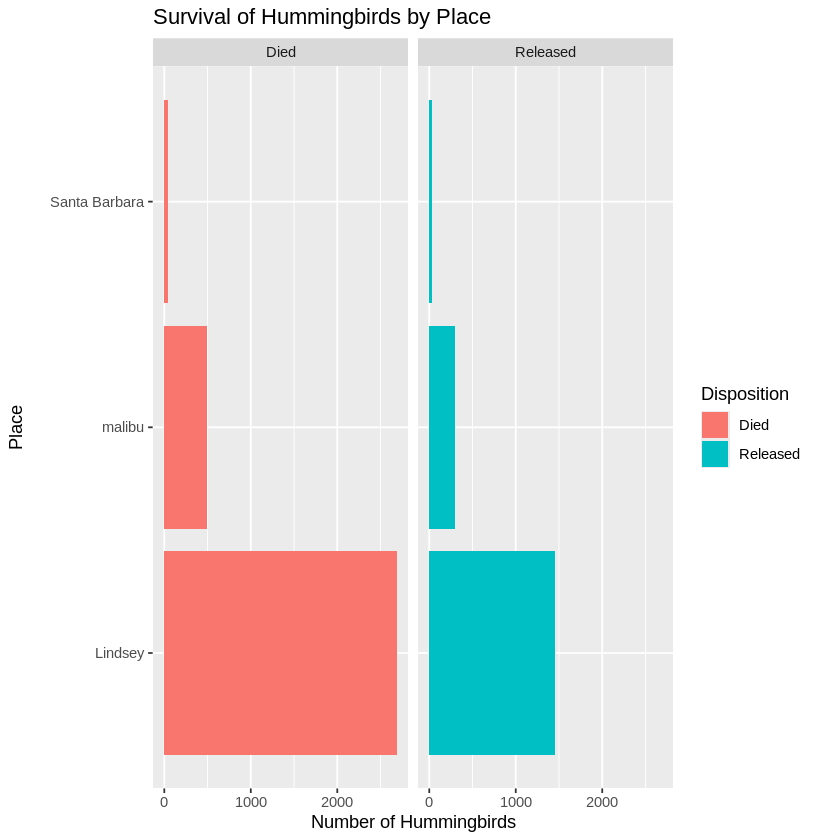

In [30]:
ggplot(table_Place, aes(x = Place, y = count, fill = as.factor(Disposition_binary))) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_grid(. ~ Disposition_binary)+ coord_flip() +
  xlab("Place") + ylab("Number of Hummingbirds") +
  labs(fill = "Disposition",
       title = "Survival of Hummingbirds by Place")

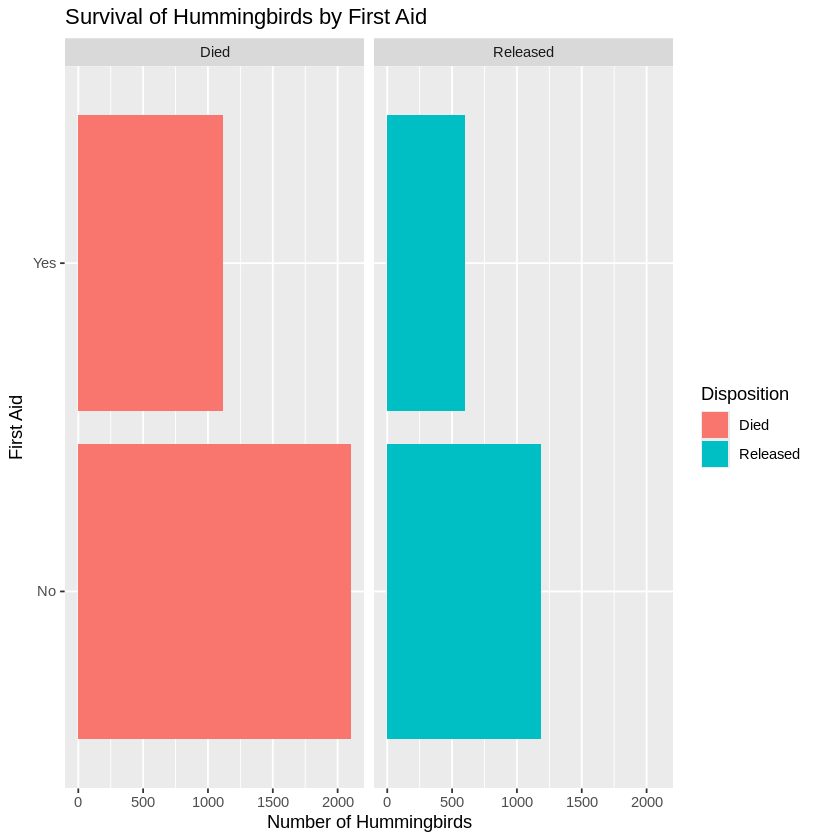

In [31]:
ggplot(table_F_Aid, aes(x = F_Aid, y = count, fill = as.factor(Disposition_binary))) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_grid(. ~ Disposition_binary)+ coord_flip() +
  xlab("First Aid") + ylab("Number of Hummingbirds") +
  labs(fill = "Disposition",
       title = "Survival of Hummingbirds by First Aid")

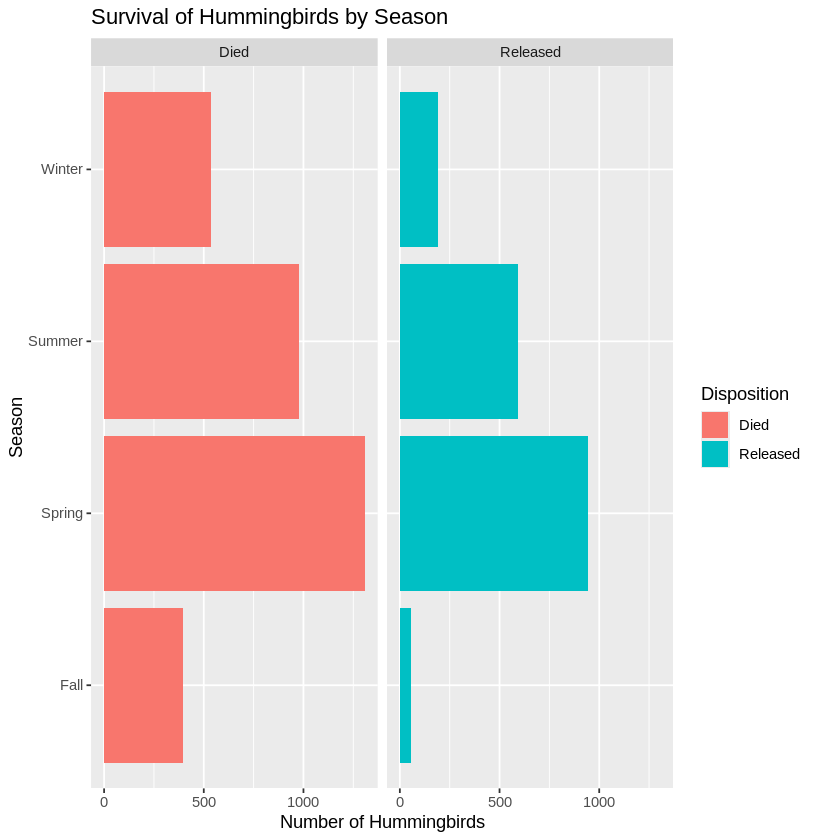

In [32]:
ggplot(table_season, aes(x = season, y = count, fill = as.factor(Disposition_binary))) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_grid(. ~ Disposition_binary)+ coord_flip() +
  xlab("Season") + ylab("Number of Hummingbirds") +
  labs(fill = "Disposition",
       title = "Survival of Hummingbirds by Season")

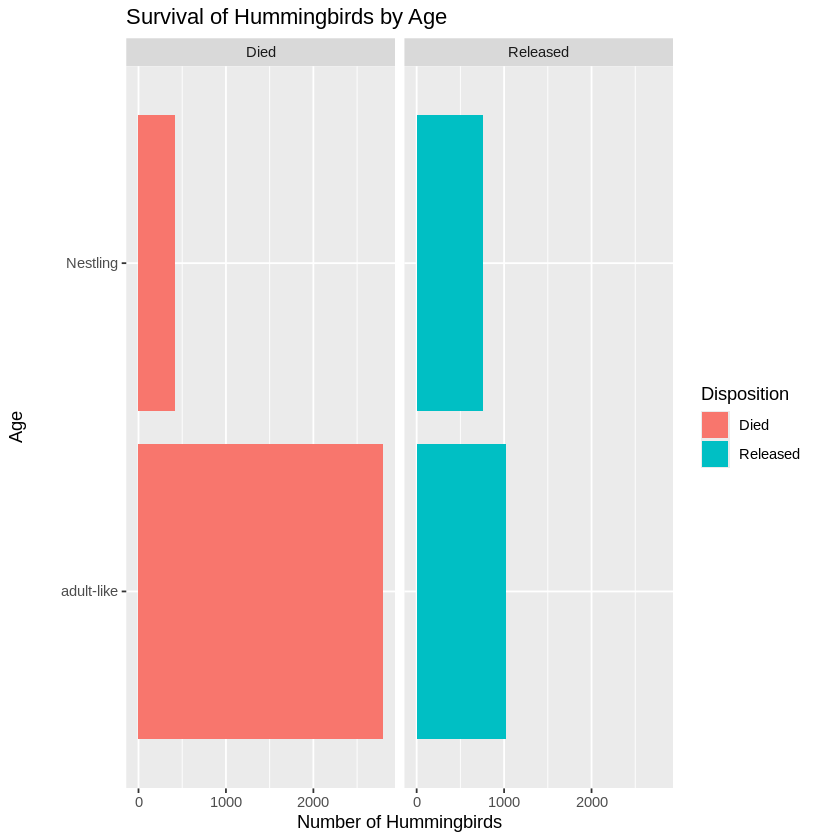

In [33]:
ggplot(table_Age_e, aes(x = Age_e, y = count, fill = as.factor(Disposition_binary))) +
  geom_bar(stat = "identity", position = "dodge") +
  facet_grid(. ~ Disposition_binary)+ coord_flip() +
  xlab("Age") + ylab("Number of Hummingbirds") +
  labs(fill = "Disposition",
       title = "Survival of Hummingbirds by Age")

**Q8: What is your observation based on those tables and plots? Do you think all those are associated with the final disposition of hummingbirds? Any suggestions for statistically testing them?  
Points: 5**

In [ ]:
# yes, according to the barplots, it looks like there is an association between survival and covariate

## Calculating Proportions

#### Q10: Calculate the proportion of hummingbirds that were released versus those that died for each rehabilitation center.
* Use the `model_data` dataframe to calculate these proportions.
*
Create a table showing the proportions for each rehabilitation center (denoted by column `Place`)   .*
Plot a bar chart to visualize these proportions.

`summarise()` has grouped output by 'Place'. You can override using the
`.groups` argument.


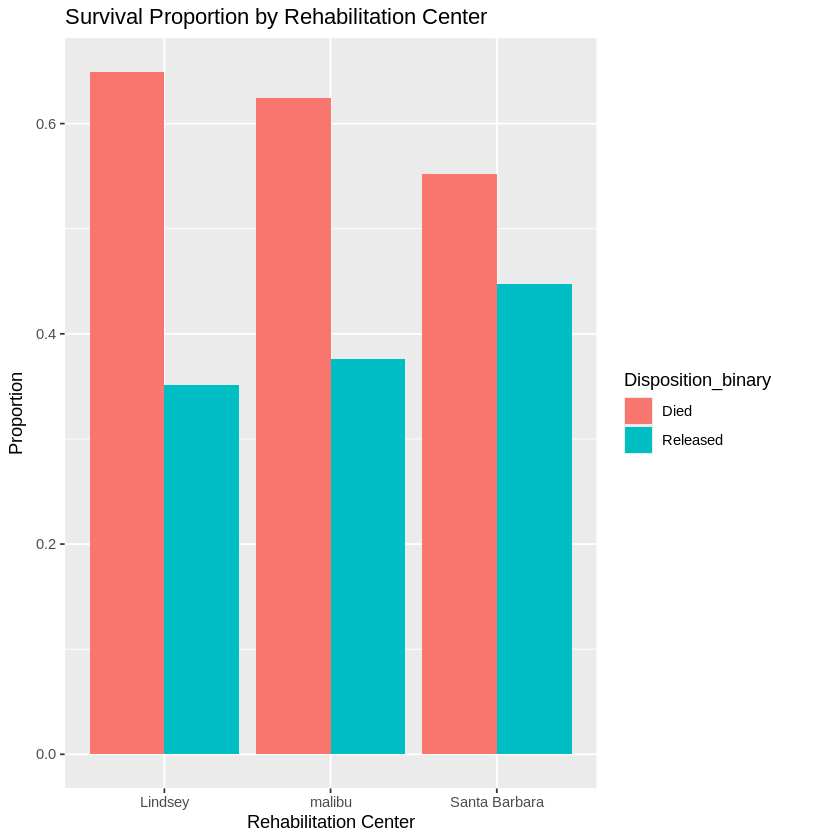

In [34]:
# Calculate proportions
proportions = model_data %>%
  group_by(Place, Disposition_binary) %>%
  summarise(count = n_distinct(ID)) %>%
  group_by(Place) %>%
  mutate(proportion = count / sum(count))

# Plot the proportions
ggplot(proportions, aes(x = Place, y = proportion, fill =  Disposition_binary)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Rehabilitation Center") +
  ylab("Proportion") +
  labs(title = "Survival Proportion by Rehabilitation Center")

### Merging Species into Groups/Families  
#### Q11: Merge the Species_e column into broader categories (e.g., Anna's Hummingbirds, Selasphorus genus, Non-selasphorus, Black-chinned Hummingbirds).
* Anna's Hummingbird, Black-chinned Hummingbird and "non-selasphorous' hummingbirds need to be classified as Non-selasphorus
* All Selasphorus species should be classified as `Selasphorus`
* Create a new column `Species_group` that categorizes the species into these broader groups.
* Tabulate and plot the distribution of hummingbirds by these new species groups.
* Analyze how the survival rates differ across these species groups.

In [35]:
table (model_data$Species_group)

< table of extent 0 >

In [36]:
## Hint: think about the logic. How would you quickly classify these species into multiple groups using ifelse statement?

model_data$Species_group = ifelse(model_data$Species_e == _____ ________,
                                  _________)

# Tabulate and plot the distribution
species_distribution = model_data %>%
  group_by(________, __________) %>%
  summarise(____________)

ggplot(_______________, aes(x = __________, y = ____, fill = ______)) +
  geom_bar() +
  xlab() +
  ylab() +
  labs(title = )

ERROR: Error in parse(text = input): <text>:3:60: unexpected input
2: 
3: model_data$Species_group = ifelse(model_data$Species_e == __
                                                              ^


In [37]:
model_data$Species_group = ifelse(
  model_data$Species_e %in% c("ANHU", "BCHU", "Non-selasphorus"),
  "Non-selasphorus", "Selasphorus")

In [38]:
# Tabulate and plot the distribution
species_distribution = model_data %>%
  group_by(Species_group, Disposition_binary) %>%
  summarise(count = n_distinct(ID))

`summarise()` has grouped output by 'Species_group'. You can override using the
`.groups` argument.


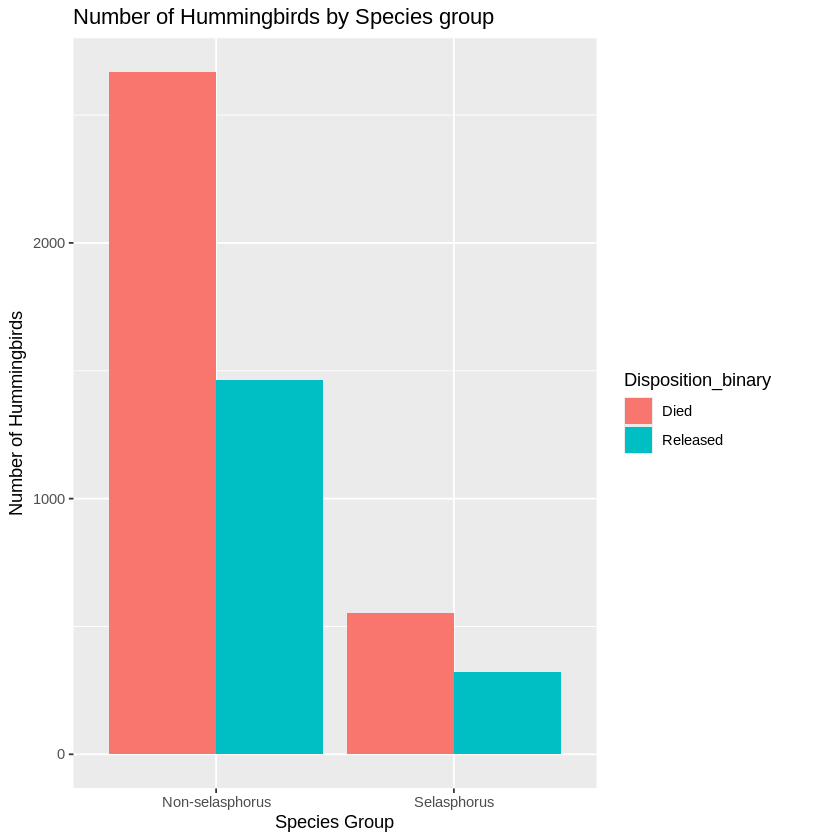

In [39]:
ggplot(species_distribution, aes(x = Species_group, y = count, fill = Disposition_binary)) +
  geom_bar (stat = "identity", position = "dodge") +
  xlab("Species Group") +
  ylab("Number of Hummingbirds") +
  labs(title = "Number of Hummingbirds by Species group")

In [ ]:
# Non-selasphorus has a higher survival rate than Selasphorus Hummingbirds according to the barplot

### Q12 Analyze the Trend of Hummingbird Admissions Over Time
* Convert the `Admitted` column to a date format.
*
Summarize the trend of hummingbird admissions over time
*
Plot the trend using `ggplot2`.

In [40]:
model_data$Admitted_date = as.Date(model_data$Admitted, format = "%m/%d/%Y")

Q12a Please explain the argument `format` in code above

In [ ]:
# format species to convert the data in the "Admitted" column to "Admitted_date" to a month/date/year value

The next step is to summarize the number of birds seen in each month and similarly in each year.

In [41]:
admissions_by_month = model_data %>%
  mutate(Admitted_month = format(Admitted_date, "%m")) %>%
  group_by(Admitted_month) %>%
  summarise(count = n_distinct(ID))

admissions_by_year = model_data %>%
  mutate(Admitted_year = format(Admitted_date, "%Y")) %>%
  group_by(Admitted_year) %>%
  summarise(count = n_distinct(ID))

Finally, we can use `ggplot` to plot these timelines.

In [42]:
# Plot admissions by month
p_month = ggplot(admissions_by_month, aes(x = Admitted_month, y = count)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Month") +
  ylab("Number of Hummingbirds") +
  labs(title = "Number of Hummingbirds by Month Admitted")

In [43]:
## Plot similar timeline for Yearly admissions of Hummingbirds
p_year = ggplot(admissions_by_year, aes(x = Admitted_year, y = count)) +
  geom_bar(stat = "identity", position = "dodge") +
  xlab("Year") +
  ylab("Number of Hummingbirds") +
  labs(title = "Number of Hummingbirds by Year Admitted")

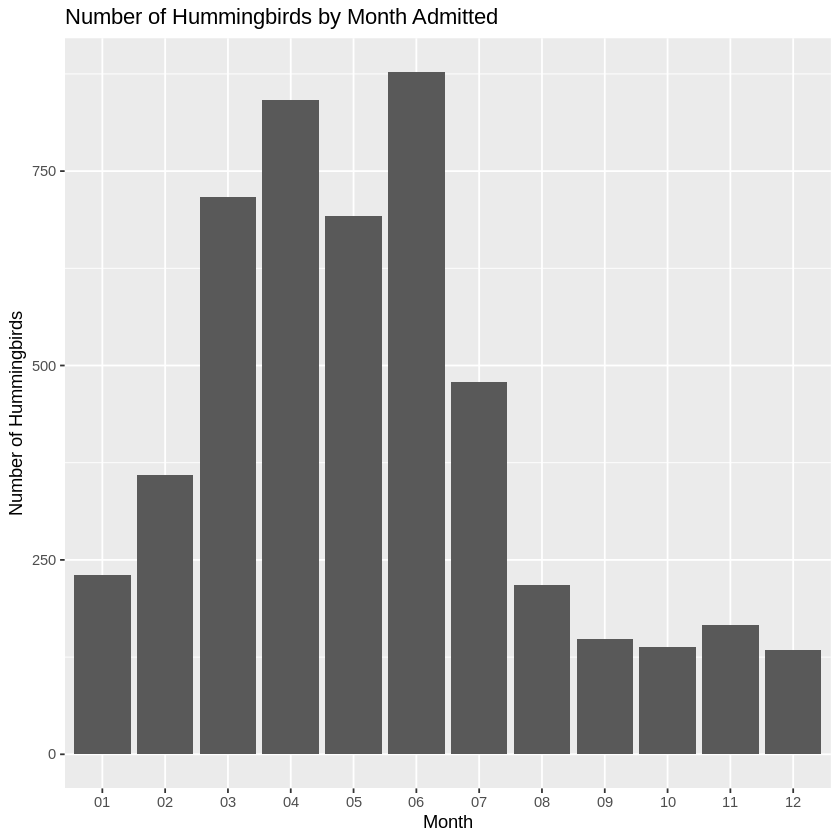

In [44]:
p_month

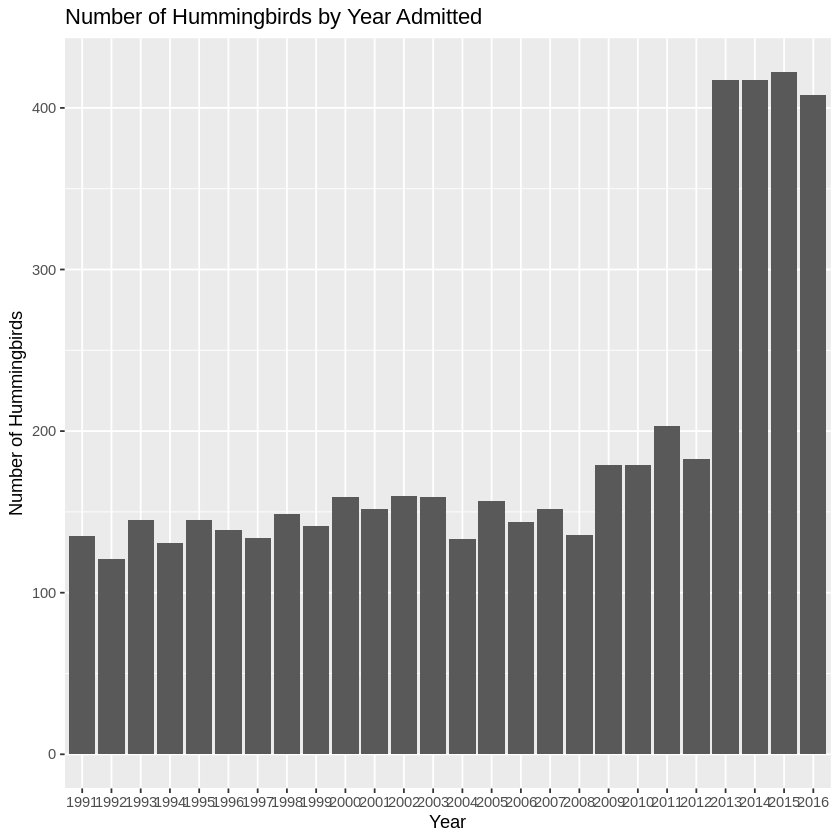

In [45]:
p_year

# **Session 8 - GitHub Session**

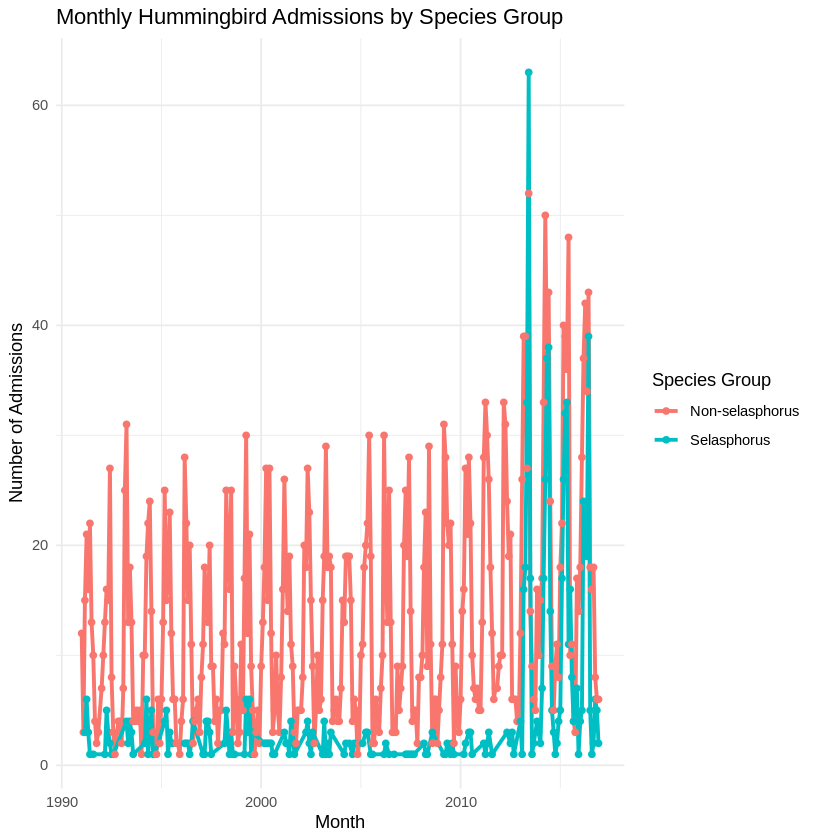

In [50]:
# Monthly admissions by species group
monthly_admissions = model_data %>%
  group_by(Month, Species_group) %>%
  summarise(count = n(), .groups = "drop")

# Create timeline plot
ggplot(monthly_admissions, aes(x = Month, y = count, color = Species_group)) +
  geom_line(size = 1.1) +
  geom_point() +
  labs(
    title = "Monthly Hummingbird Admissions by Species Group",
    x = "Month",
    y = "Number of Admissions",
    color = "Species Group"
  ) +
  theme_minimal()